# Détection de segments dans une image

C'est une technique assez vieille et qui consiste à détecter des segments comme des anomalies : l'alignement de points est un événement assez rare dans un nuage de points mais rare comment ? Cette idée mène à la probabilisation d'une image pour quantifier ce qu'est un alignement de points nécessairement rare.

## Une image aléatoire

On considère un bruit aléatoire uniforme dans une image et on ajoute des points aléatoires tirés le long d'une ligne selon une loi gaussienne : uniforme sur la ligne, gaussien autour du segment.

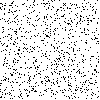

In [17]:
from mlstatpy.image.detection_segment import random_noise_image, convert_array2PIL

img = random_noise_image((100, 100))
convert_array2PIL(img, mode="binary")

In [18]:
from mlstatpy.image.detection_segment import random_segment_image

random_segment_image(img, density=3.0, lmin=0.3)

{'size': 43,
 'angle': 0.45754951975081887,
 'x1': 8,
 'y1': 43,
 'x2': 46.576920763478554,
 'y2': 61.995293743669706,
 'nbpoints': 129}

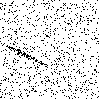

In [19]:
convert_array2PIL(img, mode="binary")

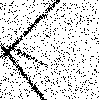

In [20]:
random_segment_image(img, density=5.0, lmin=0.3)
random_segment_image(img, density=5.0, lmin=0.3)
convert_array2PIL(img, mode="binary")

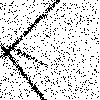

In [21]:
pilimg = convert_array2PIL(img, mode="binary").convert("RGB")
pilimg

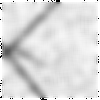

In [22]:
from PIL import ImageFilter


pilimg = (
    pilimg.filter(ImageFilter.BLUR)
    .filter(ImageFilter.BLUR)
    .filter(ImageFilter.BLUR)
    .filter(ImageFilter.BLUR)
)
pilimg

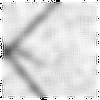

In [23]:
from PIL import ImageEnhance

enh = ImageEnhance.Sharpness(pilimg)
final_img = enh.enhance(4)
final_img

## Gradient

La détection des segments est basée sur le gradient.

In [24]:
from mlstatpy.image.detection_segment import compute_gradient, plot_gradient

grad = compute_gradient(final_img, color=0)

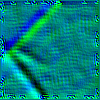

In [25]:
plot_gradient(pilimg.copy(), grad, direction=-2)

## Détection de segments

In [26]:
from mlstatpy.image.detection_segment import detect_segments

seg = detect_segments(final_img, verbose=1, seuil_nfa=1e-1)
len(seg)

n =  1000  ...  81  temps  0.21  sec nalign 277
n =  2000  ...  152  temps  0.34  sec nalign 640
n =  3000  ...  180  temps  0.49  sec nalign 917
n =  4000  ...  290  temps  0.62  sec nalign 1312
n =  5000  ...  315  temps  0.81  sec nalign 1535
n =  6000  ...  330  temps  0.98  sec nalign 1859
n =  7000  ...  426  temps  1.14  sec nalign 2093
n =  8000  ...  457  temps  1.29  sec nalign 2425
n =  9000  ...  604  temps  1.53  sec nalign 2756


605

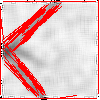

In [27]:
from mlstatpy.image.detection_segment import plot_segments

plot_segments(final_img.copy(), seg)

## Détection de segments sur une image

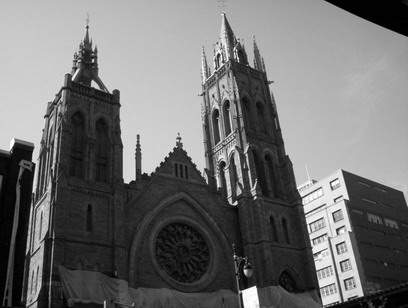

In [28]:
from PIL import Image

egl = Image.open("eglise_zoom2.jpg")
egl

On réduit la taille de l'image.

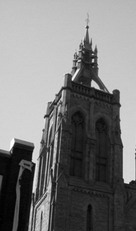

In [29]:
egl2 = egl.crop((0, 0, egl.size[0] // 3, 3 * egl.size[1] // 4))
egl2

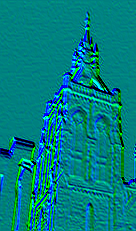

In [30]:
grad2 = compute_gradient(egl2, color=0)
plot_gradient(egl2.copy(), grad2, direction=-2)

In [31]:
seg2 = detect_segments(egl2)
len(seg2)

490

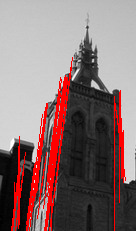

In [32]:
from mlstatpy.image.detection_segment import plot_segments

res = plot_segments(egl2.copy(), seg2)
res

Il faudrait fusionner les segments mais cela a l'air de marcher.